In [14]:
# remove warning message
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# required library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from local_utils import detect_lp
from os.path import splitext,basename
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelEncoder
import glob
import functools
#import funtions2 as g5
import result_gen2 as g5
import importlib
importlib.reload(g5)
#import generator5 as g5
#import load_model, preprocess_image, get_plate, segment, mask_gen, find_cand, find_rect, make_crop, recogn, output

<module 'result_gen2' from '/Users/ykb/Downloads/pdr/result_gen2.py'>

In [15]:

#wpod_net_path = "MobileNets_character_recognition.json"
wpod_net_path = "models/wpod-net.json"
wpod_net = g5.load_model(wpod_net_path)
json_file = open('models/MobileNets_character_recognition.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("models/License_character_recognition_weight.h5")
print("[INFO] Model loaded successfully...")
labels = LabelEncoder()
labels.classes_ = np.load('models/license_character_classes.npy')
print("[INFO] Labels loaded successfully...")

Loading model successfully...
[INFO] Model loaded successfully...
[INFO] Labels loaded successfully...


In [16]:
directory = "check1/"
images = []
for filename in os.listdir(directory):
    if filename[0] != ".":
        f = os.path.join(directory, filename)
        # checking if it is a file
        st = f.replace('/',',').replace('.',',').split(',')
        #print(st)
        if os.path.isfile(f):
            #pro = st[1]
            cha = st[1]
            dic = {"file": f,"cha": cha}
            '''if len(dic['pro']) != 3 or len(dic['cha']) != 6:
                print(dic['pro'], dic['cha'])
                assert f, "name error"'''
            images.append(dic)
len(images)

93

In [17]:
images[50]['file']

'check1/ZM568TM.jpg'

In [18]:
import importlib
importlib.reload(g5)

<module 'result_gen2' from '/Users/ykb/Downloads/pdr/result_gen2.py'>

1/1 [==============================] - 0s 66ms/step
white


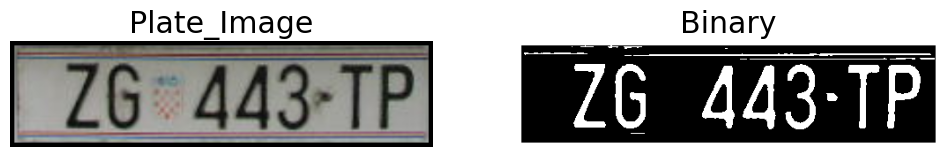

In [64]:
#test_image_path = images[50]['file']
#test_image_path = 'check1/ZG4949S.jpg'
test_image_path = 'check1/ZG443TP.jpg'
vehicle, LpImg= g5.get_plate(test_image_path, wpod_net)
plate_image, binary= g5.segment(LpImg)
#crop_characters = char_detection(plate_image, binary)
# visualize results    

fig = plt.figure(figsize=(12,7))
plt.rcParams.update({"font.size":18})
grid = gridspec.GridSpec(ncols=2,nrows=1,figure = fig)
plot_image = [plate_image,binary]#, blur, binary, thre_mor, kernel3]
plot_name = ['Plate_Image','Binary']
for i in range(len(plot_image)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(plot_name[i])
    if i ==0:
        plt.imshow(plot_image[i])
    else:
        plt.imshow(plot_image[i],cmap="gray")

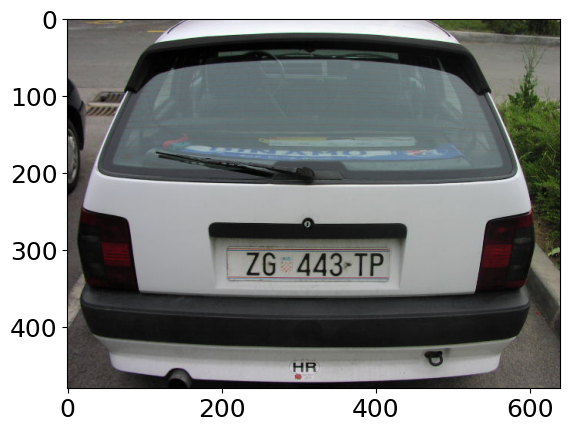

In [9]:
img = cv2.imread('check1/ZG443TP.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

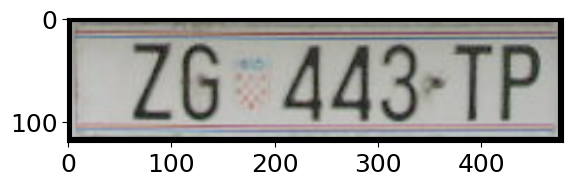

In [10]:
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
    return cv2.LUT(src, table)
newP = gammaCorrection(plate_image, 1.5)
plt.imshow(newP)

In [11]:
def check_col(img, thre = 127):
    avg_color_per_row = np.average(img, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)
    if avg_color > thre:
        return 'black'
    else:
        return 'white'
pi = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))
print(check_col(binary))

white


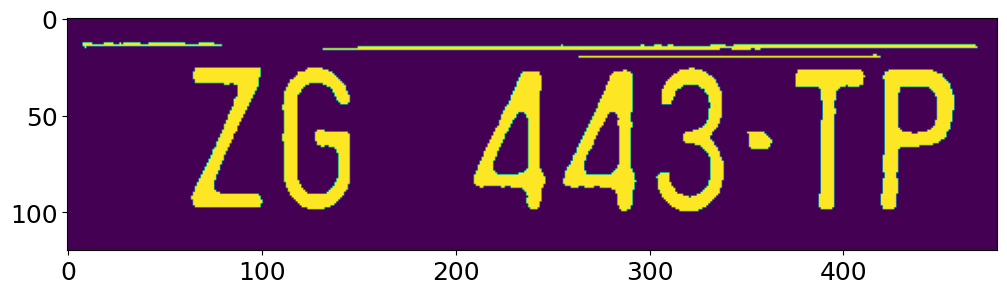

In [12]:
fig = plt.figure(figsize=(12,7))
'''grid = gridspec.GridSpec(ncols=2,nrows=1,figure = fig)
fig.add_subplot(grid[0])
mask = mask_gen(plate_image, thre_mor)
plt.imshow(mask)
fig.add_subplot(grid[1])'''
mask = g5.mask_gen(plate_image, binary)
plt.imshow(mask)

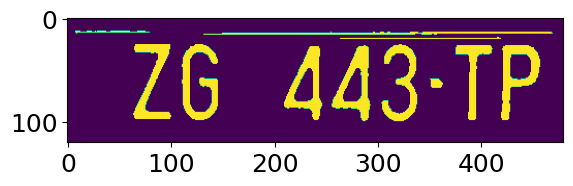

In [13]:
mask2 = g5.mask_gen(plate_image, mask)
plt.imshow(mask)

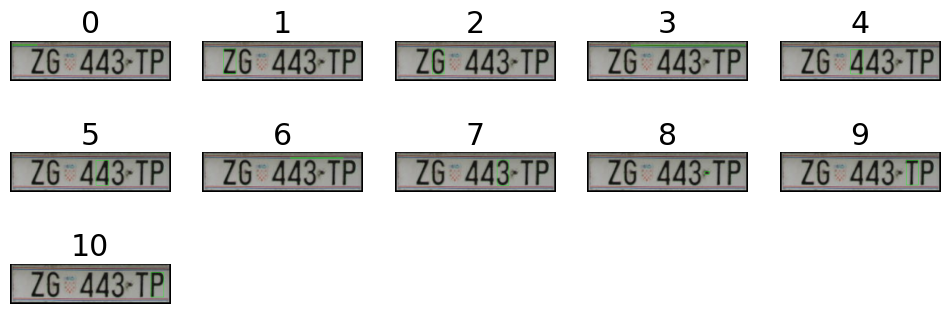

In [14]:
cand = g5.find_cand(plate_image, mask)

fig = plt.figure(figsize=(12,7))
grid = gridspec.GridSpec(ncols=5,nrows=5,figure = fig)
for i in range(len(cand)):
    x,y,w,h = cand[i]
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(str(i))
    plate = plate_image.copy()
    cv2.rectangle(plate, (x,y), (x+w,y+h), (0, 255, 0), 1)
    plt.imshow(plate)

In [15]:
print(cand)

[(8, 13, 72, 3), (64, 26, 37, 72), (111, 26, 35, 73), (132, 14, 338, 3), (210, 28, 37, 71), (256, 27, 38, 73), (264, 19, 156, 2), (304, 26, 35, 74), (351, 59, 13, 9), (376, 27, 36, 72), (420, 27, 38, 72)]


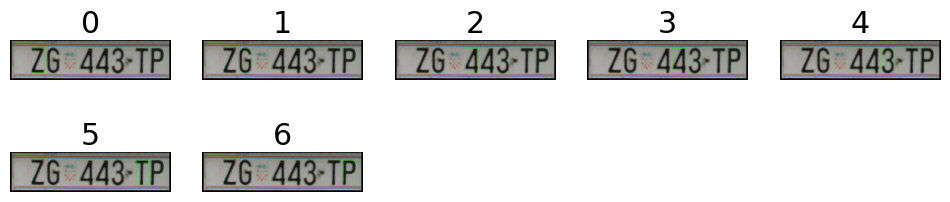

In [16]:
rects = g5.find_rect(plate_image, cand)

fig = plt.figure(figsize=(12,7))
grid = gridspec.GridSpec(ncols=5,nrows=5,figure = fig)
for i in range(len(rects)):
    x,y,w,h = rects[i]
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(str(i))
    plate = plate_image.copy()
    cv2.rectangle(plate, (x,y), (x+w,y+h), (0, 255, 0), 1)
    plt.imshow(plate)

In [17]:
print(rects)

[(64, 26, 37, 72), (111, 26, 35, 73), (210, 28, 37, 71), (256, 27, 38, 73), (304, 26, 35, 74), (376, 27, 36, 72), (420, 27, 38, 72)]


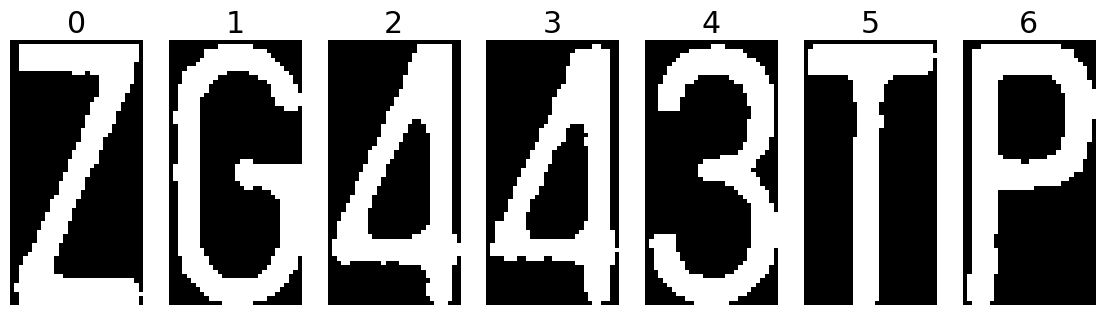

In [18]:
result_img, crop_characters = g5.make_crop(plate_image, mask, rects)

fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)
for i in range(len(crop_characters)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(str(i))
    plt.imshow(crop_characters[i],cmap="gray")

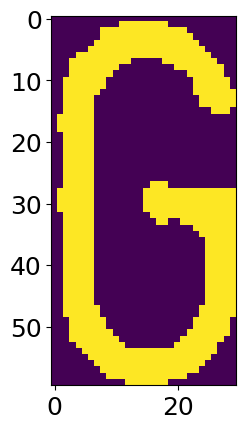

In [19]:
A = crop_characters[1]
output = "character_gen"
plt.imshow(A)
#cv2.imwrite(output + '/' + "a.jpg", A)

In [20]:
plt.savefig('a.jpg')

<Figure size 640x480 with 0 Axes>

In [21]:
final_string = g5.recogn(crop_characters, model, labels)

print(final_string)

1/1 [==============================] - 0s 14ms/step
ZG443TP


In [ ]:
import importlib
importlib.reload(g5)

In [ ]:
print(g5.output('check1/ZG995NN.jpg', wpod_net, model, labels))

In [ ]:
'LN6O8AC'

In [ ]:
ims = 

In [ ]:
{'LN608AC': 'LN6O8AC', 'ZG416PZ': 'ZGD16PZ', 'VK55AG': 'VK551AGlengh problem', 'MMM7780': 'NNN78Glengh problem', 'KR988AP': 'KP988AP', 'RI982JF': 'P1982JF', 'ZD448AK': '70448AK', '2216YE06': '22EEJlengh problem', 'LJE797R': 'LJE797P', 'BV593KX': 'BV595KXHlengh problem', 'SI582AM': 'S1582AH', 'ZG8481L': 'Z68D81L', 'ZG367S0': '367SOlengh problem', 'SB798AM': 'SB798AN', 'ZG1268AK': 'ZG8AKlengh problem', 'DJ944AE': 'EDJ9DDAElengh problem', 'DU986BM': 'DU986BN', 'KI43GC': 'K143GC', 'ZD125AM': 'ZD125AN', 'ZG415MA': 'ZG415NA', 'LJT731F': 'LJT731lengh problem', 'ZG1041P': 'ZG10D1P', 'SI450AB': 'S1450AB', 'RI883FV': 'P1883FV', 'ST102EU': 'ST1O2EU', '304E726': '3O4E726', 'IM954S': '1N954S', 'LBVM427': 'LBVN427', 'DAHCK190': 'DAHCK9Olengh problem', 'AICMM147': 'AICHV147', 'KAAC1689': 'UKAAC1689lengh problem', 'SI569AD': 'S1569AD', 'PU253IB': 'PU2531B', 'ZG662PV': 'C662PVlengh problem', 'KR531CD': 'KP531CD', 'GPJ442': 'PJ442lengh problem', 'BH633ZE': 'BH655ZE', 'FFU1004': 'FFU1GG4', 'CK311BR': 'CK311BP', 'VU806J': 'VLJ306Jlengh problem', 'RI373KI': 'P1373K1', 'ZG6983AG': 'ZGlengh problem', 'DA545AI': None, 'RI741CR': 'P1741CP', 'V809': 'VT809Tlengh problem', '032A163': '032A763', 'KT451AN': 'KTD51AN', '0G6920': '0G692O', 'VB767C': 'V3767C', 'SI610AK': 'SU610AK', 'BIRM160': 'BIPN160', 'BJ578AV': None, 'SI124BP': 'S1124BP', 'SK52BL': 'SK152BLlengh problem', 'ZG759RR': 'BZG75PP', 'GS971AI': 'GS971A1', '489T051': '489TO57', 'VK750AI': 'VK750A1', 'K8948M': 'KF8948Nlengh problem', '712J032': '712JO32', 'ST937IS': 'CST937TSlengh problem', 'FBRE182': 'FBPE182', 'KR691CI': 'KP691C1', 'KR956CA': 'KP956CA', 'W51620L': 'W5161Llengh problem', 'ZG1665AE': 'BZG1665AElengh problem', 'SI334BM': 'S1334BN', 'RI949GE': 'PU949GE', 'HHR85G': 'HHP85G', 'ZG461DJ': '461DJlengh problem', 'PU646DI': 'PU646DT', 'ZG210EH': 'HBZG210EHlengh problem', 'MA398AG': 'NA398AG', 'VU35F': 'VU135Flengh problem', 'ZG2751B': 'ZG751Blengh problem', 'ST174IC': 'ST174TC', 'DE359M': 'DE359H', 'W21337S': '21lengh problem', 'IL111AT': '1L111AT', 'ZG264TJ': 'HZG264TJlengh problem', 'SI663BN': 'ST663BN', 'ZG521II': 'ZG521T1', 'KR401A': 'KP401A', 'M7037T': 'H7U37T', 'W78512C': 'W78512lengh problem', 'RI365FN': 'P1365FN', 'ZG1908AA': 'ZG190AAlengh problem', 'VU318AK': 'BVU318AKlengh problem', 'BJ765BM': 'BJ76BHlengh problem', 'KC538AG': 'KC538DG', 'ZG483ZM': 'ZG483ZN', 'ST37K': 'ST317KJlengh problem', 'VU253H': 'VU253F1lengh problem', 'ZG051DM': 'ZG051DN', 'SK80BU': 'SK180BNlengh problem', 'ZG7761M': 'ZG7761N', 'HA356M': 'HA356H', 'SK34CK': 'SK314CKlengh problem', 'ZG990NL': 'ZG990N1', 'RI486JD': 'P1D86JD', 'FAM165': 'FAH165', 'RI580KC': 'PH580KC', 'BW678RX': 'BU678PX', 'PU658EI': 'PTU0T7lengh problem', 'HGAS1802': 'HGAS18G2', 'BJ100EE': 'BJ10OEE', 'RI1201AR': 'PH1201AP', 'HB698AI': 'HB698A1', 'SI661BH': 'S1661BH', '0U871CB': 'DU871CB', 'SNZ188': 'SNZ1588lengh problem', 'RI0205MC': 'PHClengh problem', '0S728I': '0S7281'}

In [ ]:
MMM7780
ZG367S0
ZG1268AK
LJT731F # delete
PU658EI
BJ765BM
===========
VU253H1.jpg

In [ ]:
SNZ188

In [ ]:
{'LN608AC': 'LN6O8AC', 'ZG416PZ': 'ZGD16PZ', 'KR988AP': 'KP988AP', 'RI982JF': 'P1982JF', 'ZD448AK': '70448AK', 'LJE797R': 'LJE797P', 'BV593KX': 'BV595KX', 'SI582AM': 'S1582AH', 'ZG977SI': 'ZG977ST', 'ZG348CR': 'ZG348CP', 'ZG8481L': 'Z68D81L', 'ZG4052AC': '40Z52GAC', 'ZG789PI': 'ZG789PT', 'SB798AM': 'SB798AN', 'DU986BM': 'DU986BN', 'KI43GC': 'K143GC', 'ZD125AM': 'ZD125AN', 'ZG415MA': 'ZG415NA', 'ZG1041P': 'ZG10D1P', 'SI450AB': 'S1450AB', 'RI883FV': 'P1883FV', 'ST102EU': 'ST1O2EU', 'ZG5670I': 'ZG5670U', '304E726': '3O4E726', 'IM954S': '1N954S', 'LBVM427': 'LBVN427', 'AICMM147': 'AICHV147', 'SI569AD': 'S1569AD', 'PU253IB': 'PU2531B', 'KR531CD': 'KP531CD', 'BH633ZE': 'BH655ZE', 'FFU1004': 'FFU1GG4', 'CK311BR': 'CK311BP', 'ZG8297I': 'ZG8297U', 'RI373KI': 'P1373K1', 'RI741CR': 'P1741CP', '032A163': '032A763', 'ZG956RZ': 'ZG956PZ', 'KT451AN': 'KTD51AN', '0G6920': '0G692O', 'VB767C': 'V3767C', 'SI610AK': 'SU610AK', 'BIRM160': 'BIPN160', 'SI124BP': 'S1124BP', 'ZG759RR': 'BZG75PP', 'GS971AI': 'GS971A1', '489T051': '489TO57', 'VK750AI': 'VK750A1', 'ZG4847S': 'ZGD8D7S', '712J032': '712JO32', 'ZG400HZ': 'ZG4O0HZ', 'FBRE182': 'FBPE182', 'KR691CI': 'KP691C1', 'ZM568TM': 'ZG568TN', 'KR956CA': 'KP956CA', 'SI334BM': 'S1334BN', 'RI949GE': 'PU949GE', 'ZG495ZR': 'ZG495ZP', 'HHR85G': 'HHP85G', 'ZG4256AI': 'ZG4256A1', 'PU646DI': 'PU646DT', 'ZG4940L': 'ZG494OL', 'ZG692MZ': 'ZG692HZ', 'MA398AG': 'NA398AG', 'ST174IC': 'ST174TC', 'DE359M': 'DE359H', 'ZG40940': 'ZG4094O', 'IL111AT': '1L111AT', 'ZG200ID': '20Z0GTD', 'SI663BN': 'ST663BN', 'ZG521II': 'ZG521T1', 'KR401A': 'KP401A', 'M7037T': 'H7U37T', 'RI365FN': 'P1365FN', 'MMM780': 'NNN78G', 'KC538AG': 'KC538DG', 'ZG483ZM': 'ZG483ZN', 'ZG051DM': 'ZG051DN', 'ZG7761M': 'ZG7761N', 'HA356M': 'HA356H', 'ZG990NL': 'ZG990N1', 'RI486JD': 'P1D86JD', 'FAM165': 'FAH165', 'RI580KC': 'PH580KC', 'BW678RX': 'BU678PX', 'HGAS1802': 'HGAS18G2', 'BJ100EE': 'BJ10OEE', 'RI1201AR': 'PH1201AP', 'ZG790D0': 'ZG790DO', 'HB698AI': 'HB698A1', 'SI661BH': 'S1661BH', 'ZG4513R': 'ZG4513P', '0U871CB': 'DU871CB', 'ZG6106I': 'ZG61O6T', '0S728I': '0S7281'}

In [ ]:
import shutil
def c
original = r'dataset_final_length_copy\{file}'
target = r'dataset_train_gen\{file}'

In [ ]:
'dataset_final/AICMM147.jpg'.replace('/',',').replace('.',',').split(',')[1]